# 使用 ggplot2 进行高级绘图-Chapter 19

- 介绍 ggplot 包

- 使用形状、颜色和尺寸对多元数据进行可视化

- 用刻面图比较各组

- 自定义 ggplot2 图

## ggplot2 包介绍

图示采用串联起来的函数创建(+)，每个函数修改属于自己的部分

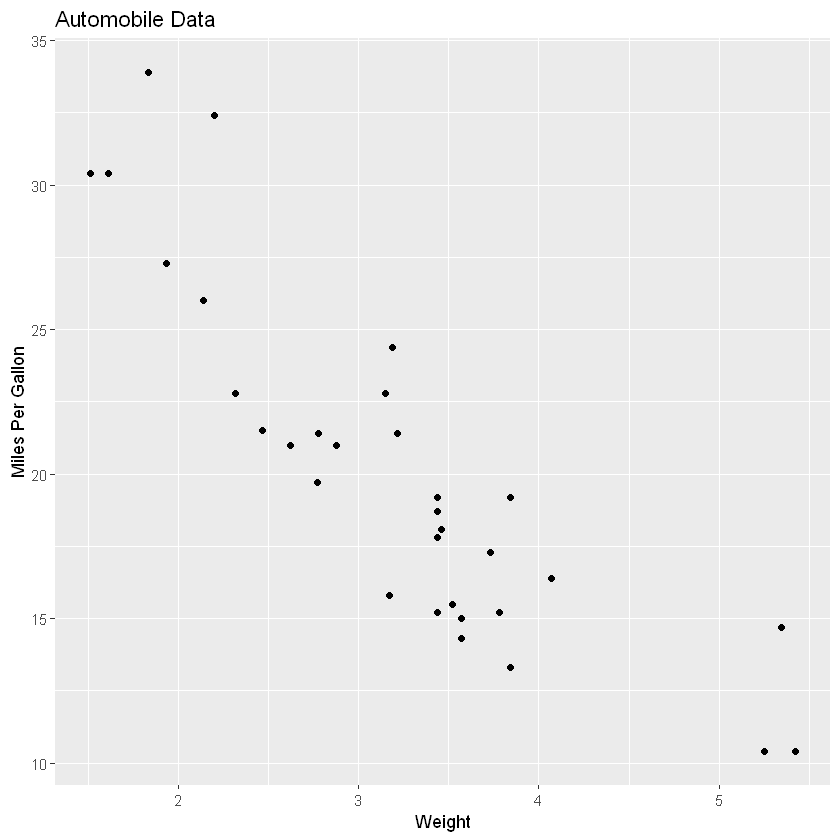

In [2]:
library(ggplot2)
ggplot(data = mtcars, aes(x=wt,y=mpg))+
geom_point()+
labs(title = "Automobile Data",x="Weight",y="Miles Per Gallon")

可以发现作图中， ggplot()初始化图形并且指定要使用到的数据来源(mtcars)和变量(wt,mpg) 而aes()函数的功能是指定每个变量扮演的角色，在这个例子中 wt 的值映射到沿着 x 轴的距离，变量 mpg 的值映射到沿着 y 轴的距离

ggplot()函数设置了图形 但是要依靠多个或者一个*几何函数*向图中添加几何对象(geom)，包括点、线、箱线图和阴影区域

下面是另外一个例子

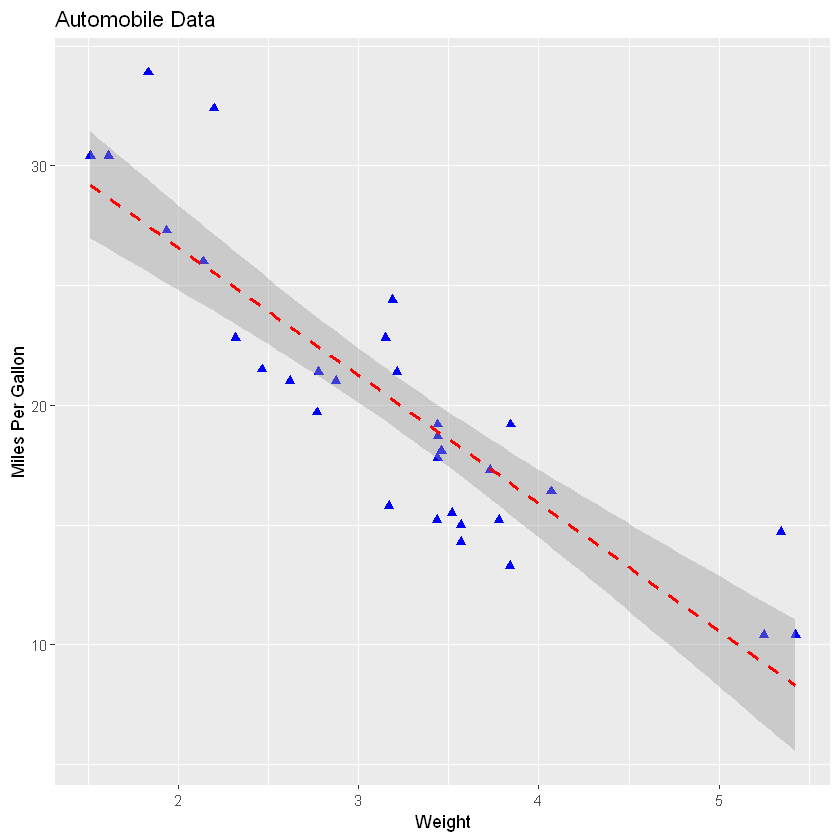

In [3]:
library(ggplot2) 
ggplot(data = mtcars,aes(x=wt,y=mpg))+
geom_point(pch=17,colour="blue",size=2)+
geom_smooth(method="lm",color="red",linetype=2)+
labs(title="Automobile Data",x="Weight",y="Miles Per Gallon")

+ 关于 facet_grid 的例子 
https://www.cnblogs.com/LearningForR/p/4651775.html

接下来绘图

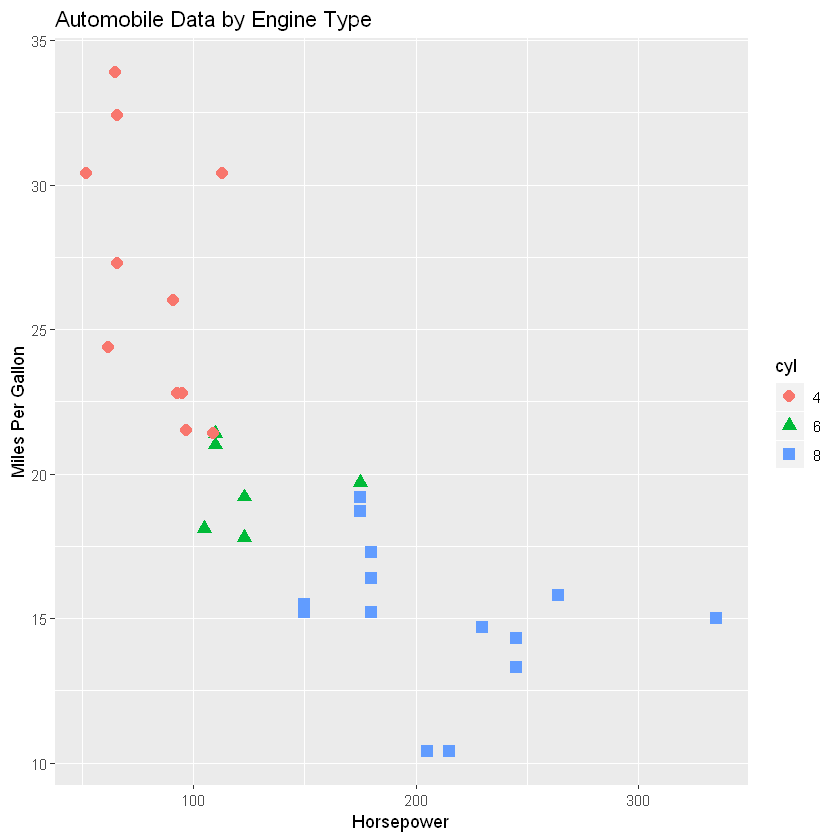

In [22]:
#ggplot2 提供了**分组**和**小面化**的方法，分组指的是在一个图形中显示两组或者多组观察结果，而小面化指的是在单独、并排的图形上显示观察组。 在定义组或者面的时候会使用因子

#下面首先将数据中的 am vs 和 cy1转化为因子
mtcars$am <- factor(mtcars$am,levels=c(0,1),labels=c("Automatic","Manual"))
mtcars$vs <- factor(mtcars$vs,levels=c(0,1),labels=c("V-engine","Straight Engine"))
mtcars$cyl <- factor(mtcars$cyl)

library(ggplot2)
ggplot(data=mtcars,aes(x=hp,y=mpg,shape=cyl,color=cyl))+
geom_point(size=3)+
#facet_grid(am~vs)+
labs(title="Automobile Data by Engine Type",x="Horsepower",y="Miles Per Gallon")

## 用几何函数指定图的类型

常见几何函数

+ geom_bar()

+ geom_boxplot()

+ geom_density()

+ geom_histogram()

+ geom_hline()

+ geom_jitter()

+ geom_line()

+ geom_point()

+ geom_rug()

+ geom_smooth()

+ geom_text()

+ geom_violin()

+ geom_viline()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


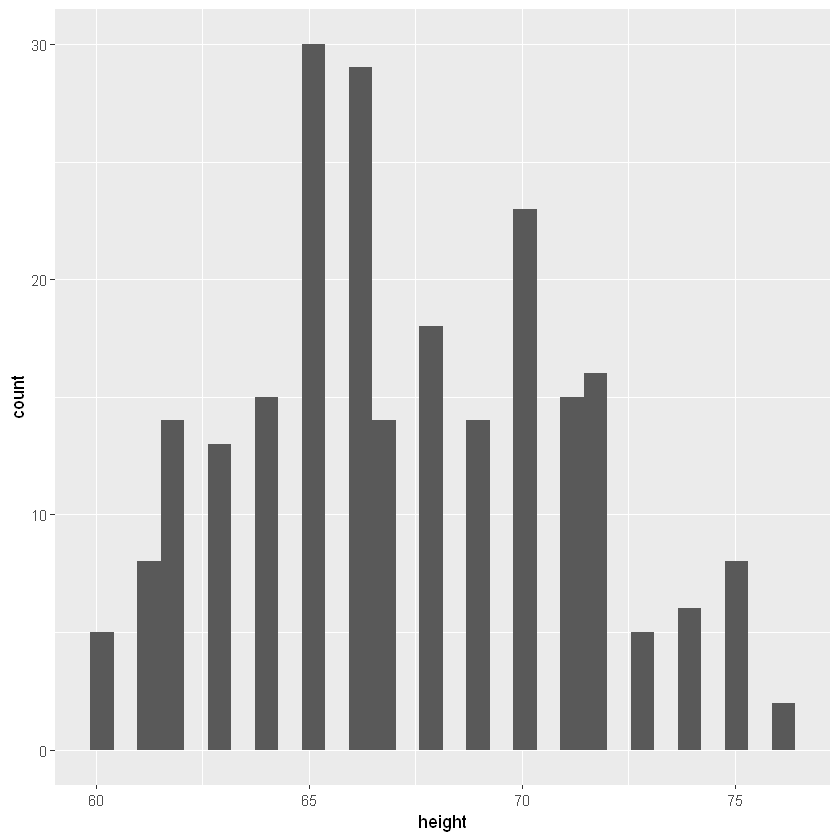

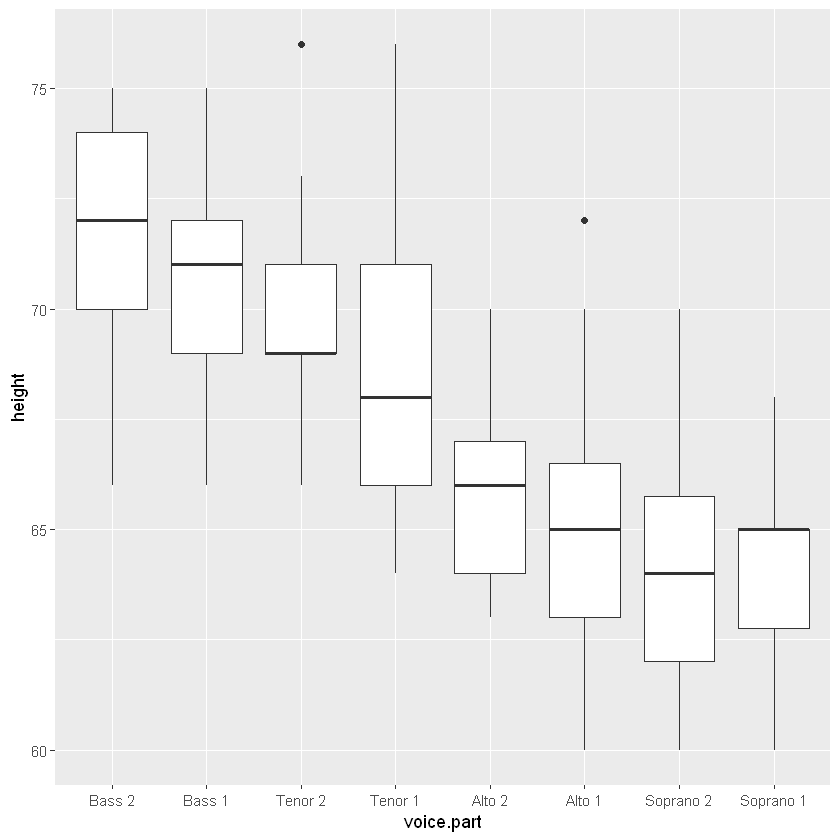

In [14]:
data(singer,package = "lattice")
ggplot(singer,aes(x=height))+geom_histogram()
ggplot(singer,aes(x=voice.part,y=height))+geom_boxplot()


注意在创建直方图时需要指定的是 x 而对箱线图则需要指定x 和 y

另外对于几何函数的常见选项

+ color 对点、线和填充区域的边界着色

+ fill 对填充区域着色

+ alpha 颜色的透明度 从0 到1 从完全透明到不透明

+ linetype 线条(1-实线 2-虚线 3-点 4-点破折号 5-长破折号 6-双破折号)

+ size 点的尺寸和线的宽度

+ shape 点的形状 (0-方形 1 圆形 2 三角形 等)

+ position 绘制图例的位置

+ binwidth 直方图的宽度

+ notch 方块图是否为缺口

+ sides 低碳图的安置

+ 箱线图的宽度

Warning message:
"Ignoring unknown parameters: side"

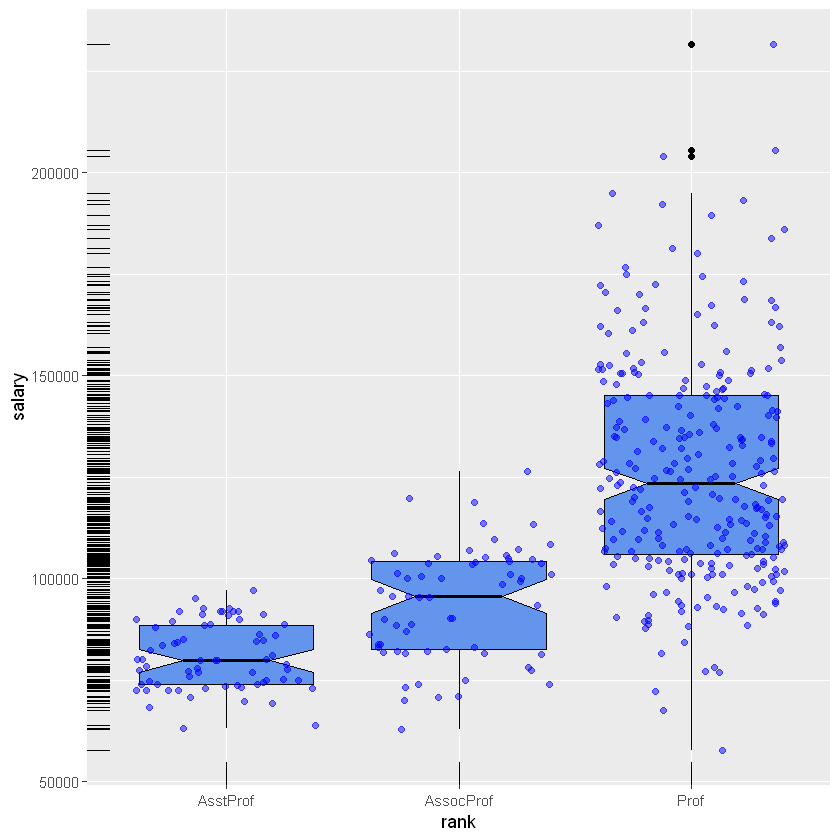

In [5]:
library(car)
library(ggplot2)
ggplot(Salaries,aes(x=rank,y=salary))+
geom_boxplot(fill="cornflowerblue",
             color = "black",notch = TRUE)+
geom_point(position = "jitter",color="blue",alpha=.5)+
geom_rug(side="1",color="black")

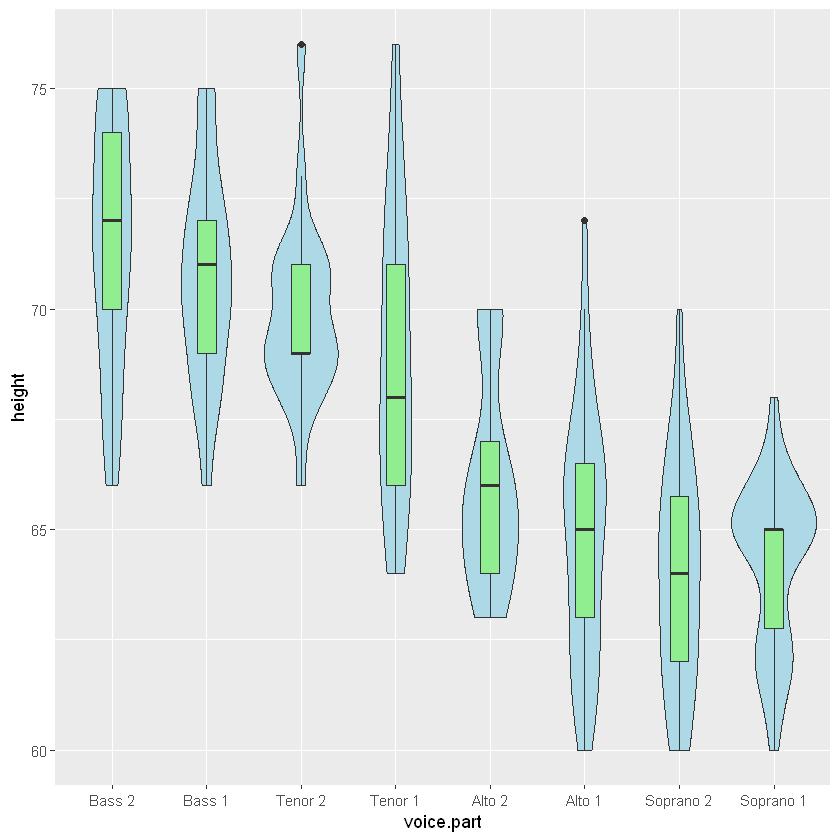

In [6]:
library(lattice)
data(singer)
library(ggplot2)
ggplot(singer,aes(x=voice.part, y= height))+
geom_violin(fill="lightblue")+
geom_boxplot(fill="lightgreen",width=.2)

## 分组

在同一个图中画出两个或者更多组的观察值往往对于数据的理解是有帮助的，而这常常可以通过定义分类变量的水平因子定义。

分组是通过一个或者多个带有诸如颜色、形状、填充、尺寸和线型的视觉特征的分组变量完成的，可以在 aes() 中进行分配分组变量

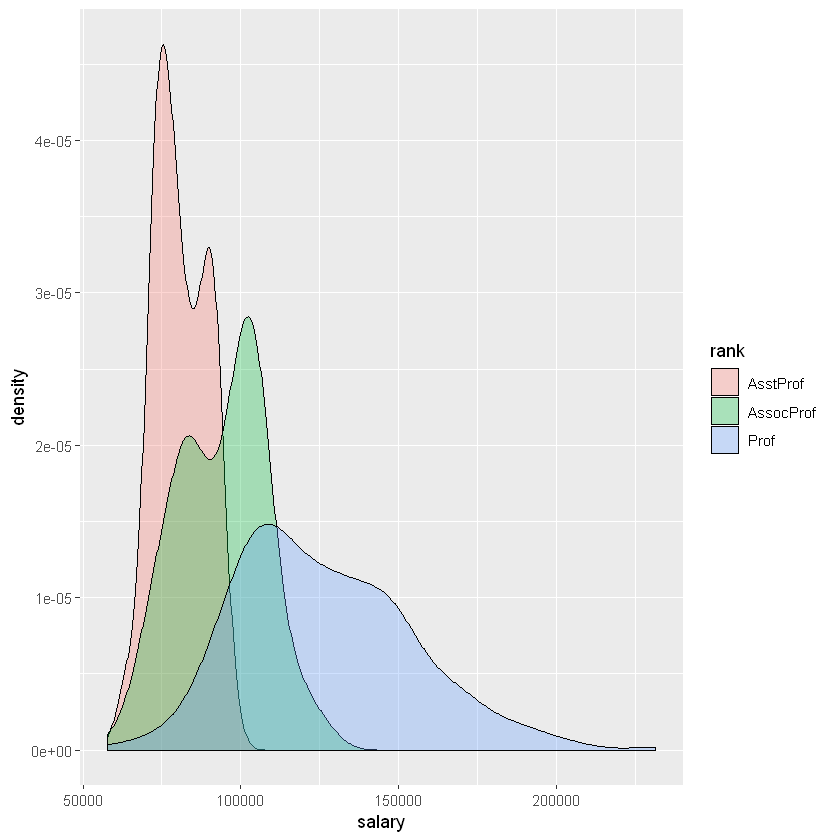

In [3]:
library(car)
data(Salaries)
library(ggplot2)
ggplot(data=Salaries, aes(x=salary, fill = rank))+
geom_density(alpha=.3)

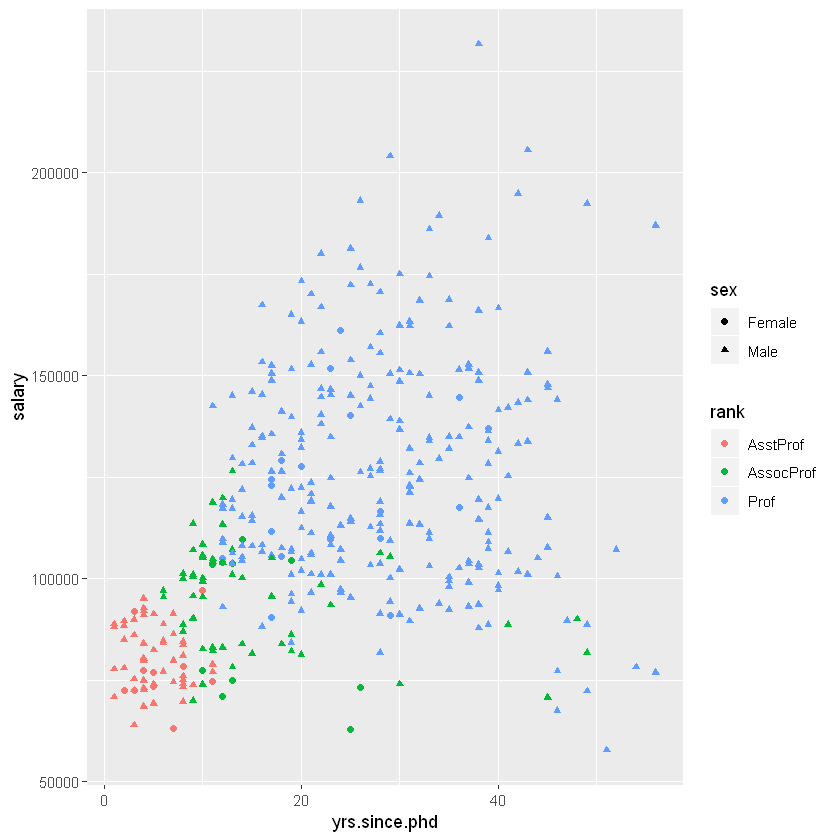

In [7]:
ggplot(Salaries,aes(x=yrs.since.phd,y=salary,color=rank,shape=sex))+
geom_point()   

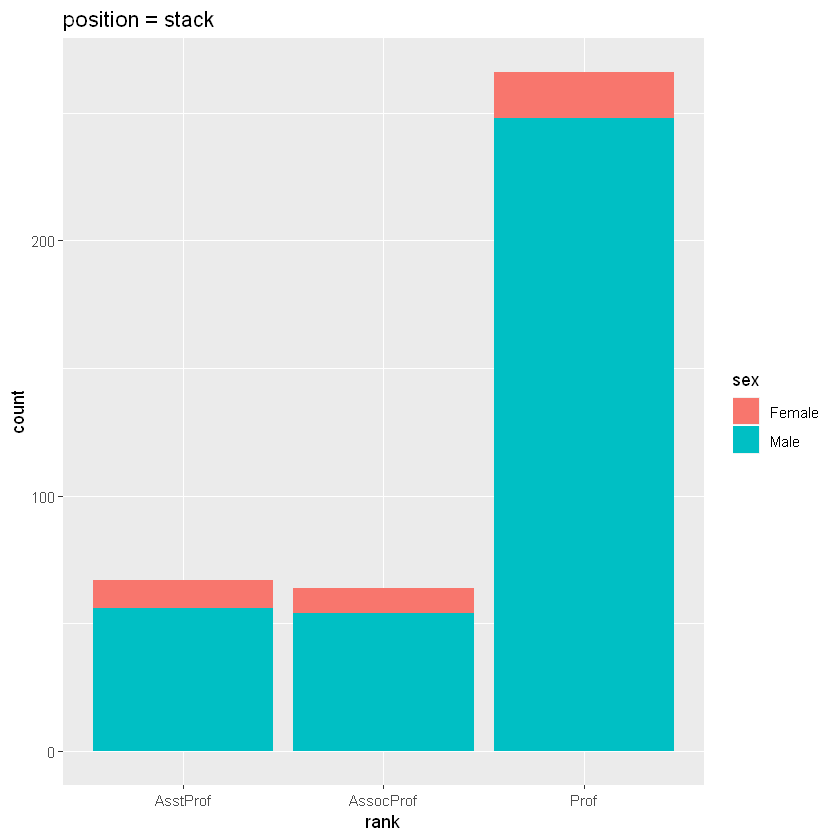

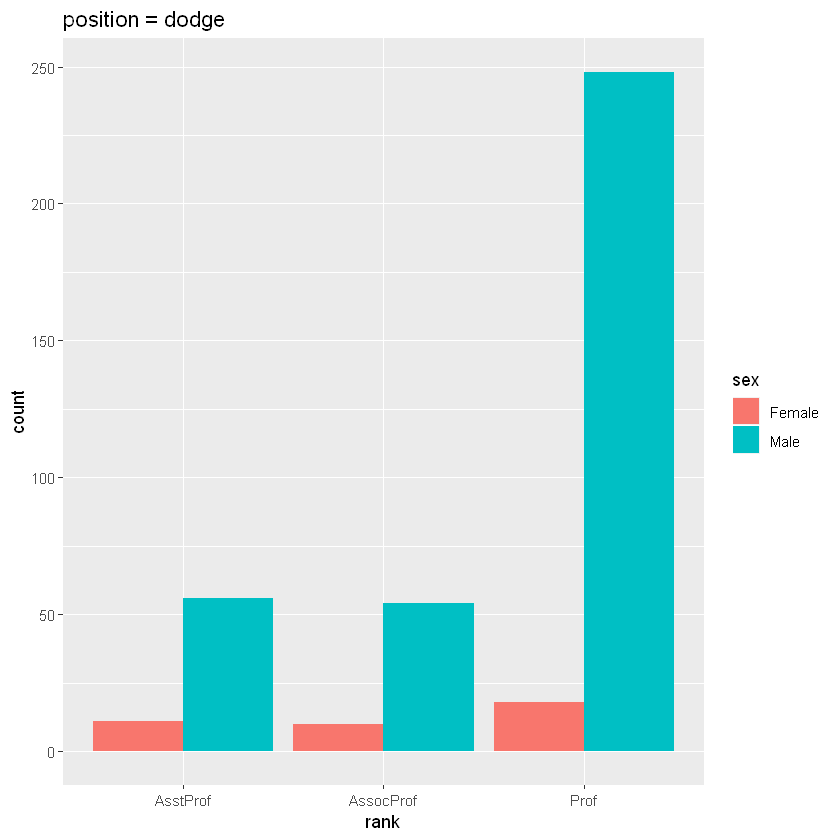

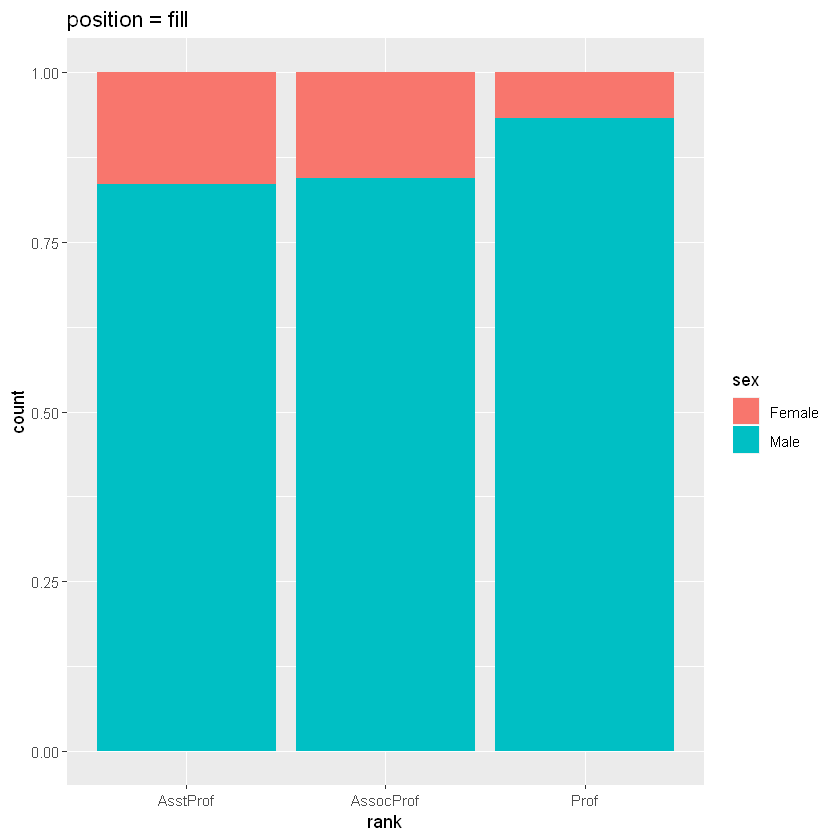

In [9]:
ggplot(Salaries,aes(x=rank,fill=sex))+
geom_bar(position="stack")+
labs(title="position = stack")

ggplot(Salaries,aes(x=rank,fill=sex))+
geom_bar(position="dodge")+
labs(title="position = dodge")

ggplot(Salaries,aes(x=rank,fill=sex))+
geom_bar(position="fill")+
labs(title="position = fill")

## 刻面
如果组在图中并列出现而不是重叠为单独的图形，其关系就是清晰的，可以使用 facet_wrap() 函数 和 facet_grid()函数创建网格图形，即所谓刻面图



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


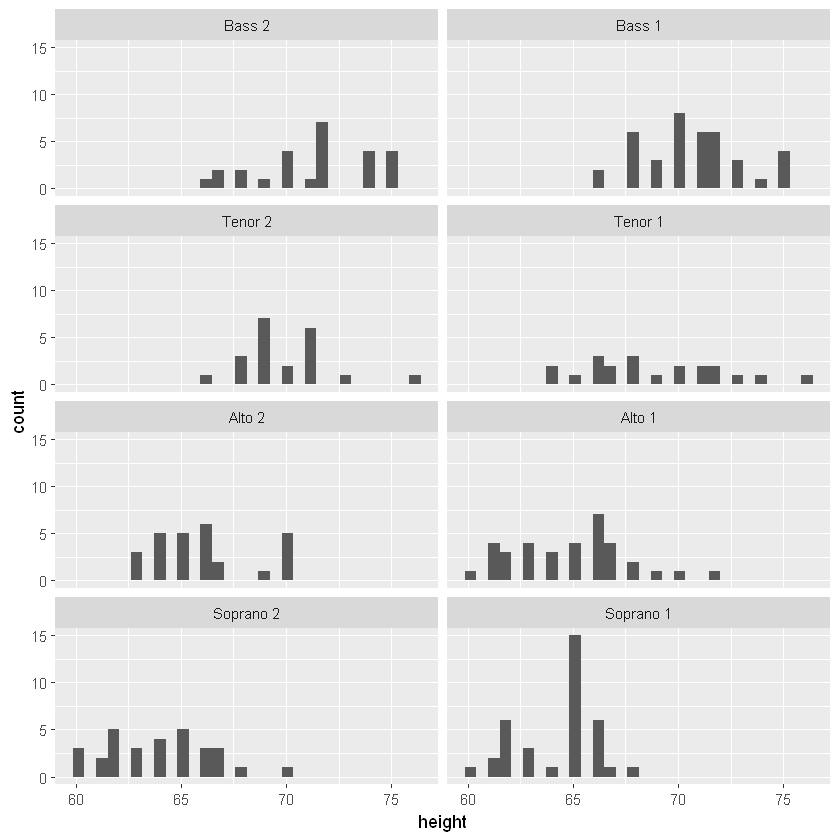

In [11]:
library(lattice)
data(singer)
library(ggplot2)
ggplot(data=singer,aes(x=height))+
geom_histogram()+
facet_wrap(~voice.part,nrow=4)


创建一个包含刻面和分组的图

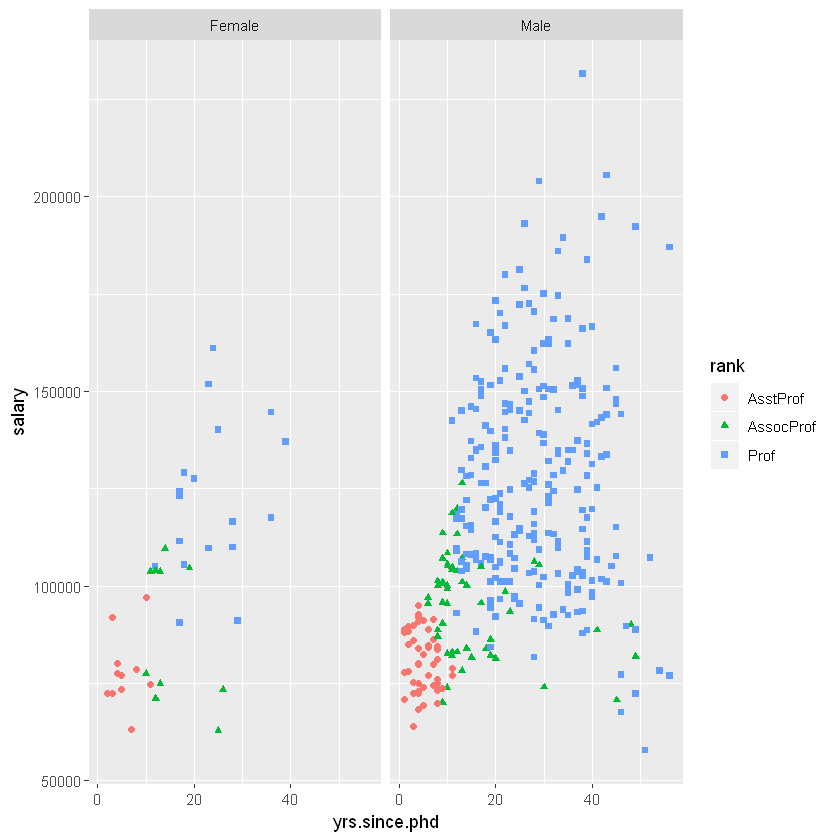

In [12]:
library(ggplot2)
ggplot(Salaries,aes(x=yrs.since.phd,y=salary,color=rank,shape=rank))+
geom_point()+
facet_grid(.~sex)

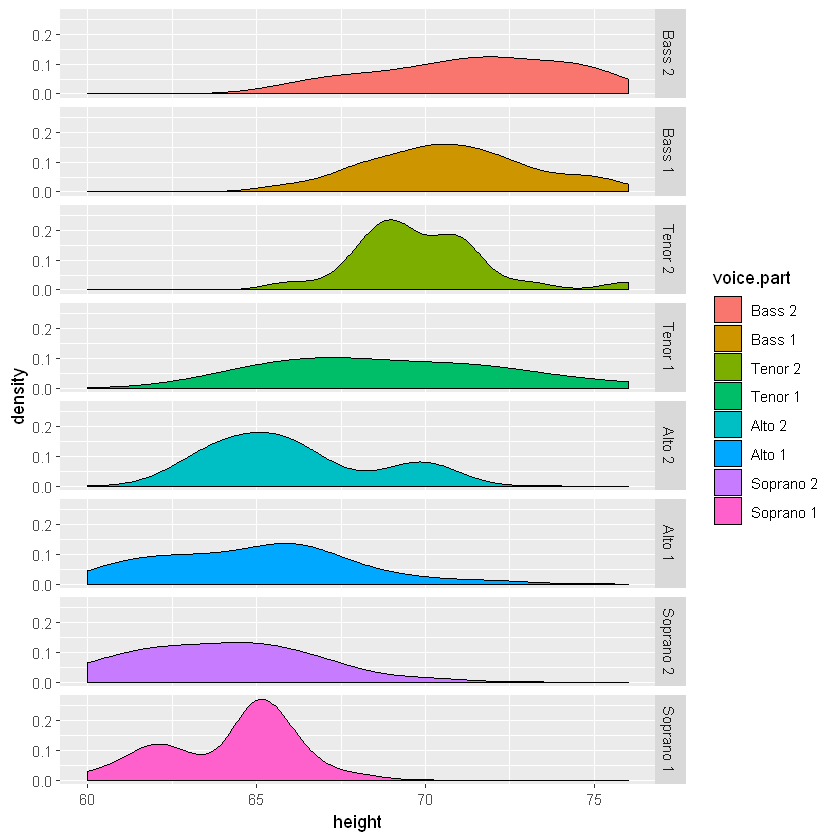

In [13]:
ggplot(data=singer,aes(x=height,fill=voice.part))+
geom_density()+
facet_grid(voice.part~.)

## 添加光滑曲线
可以使用 geom_smooth() 函数来添加一系列的平滑曲线和置信区域
+ method 使用的平滑函数

+ formula 使用的公式 包括 y~x y~log(x) y~poly(x,n) y~ns(x,n)（样条）

+ se 绘制置信区间 默认为 TRUE

+ level 使用的置信区间水平（默认为95%）

+ fullrange 指定拟合全图(TRUE)或者仅仅是数据(FALSE) 默认为FALSE

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


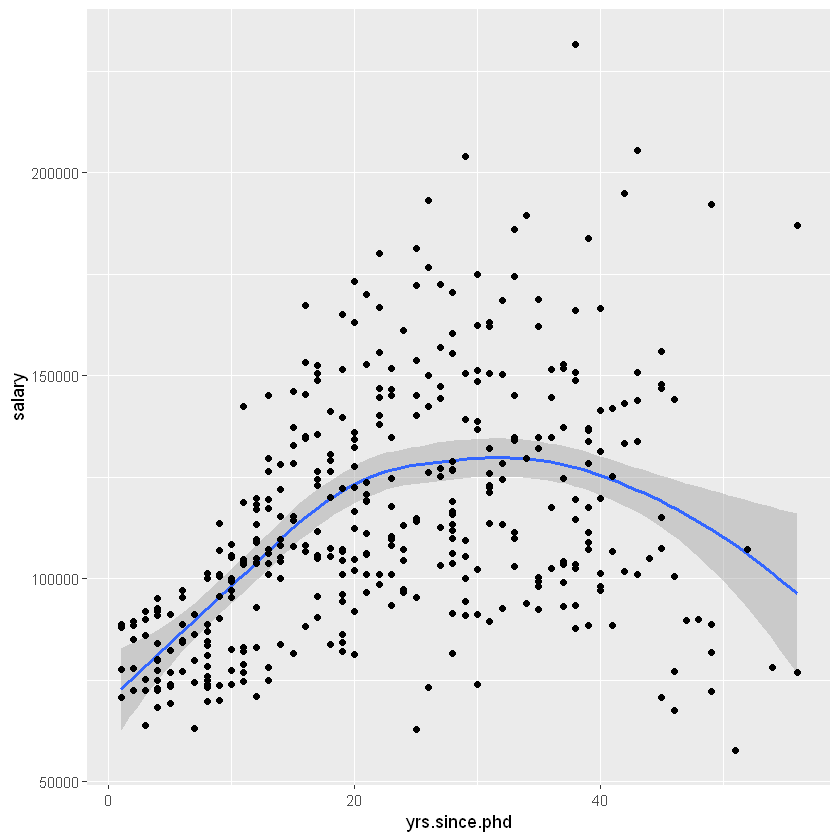

In [16]:
library(car)
data(Salaries)
library(ggplot2)
ggplot(data = Salaries, aes(x=yrs.since.phd,y=salary))+
geom_smooth()+
geom_point()

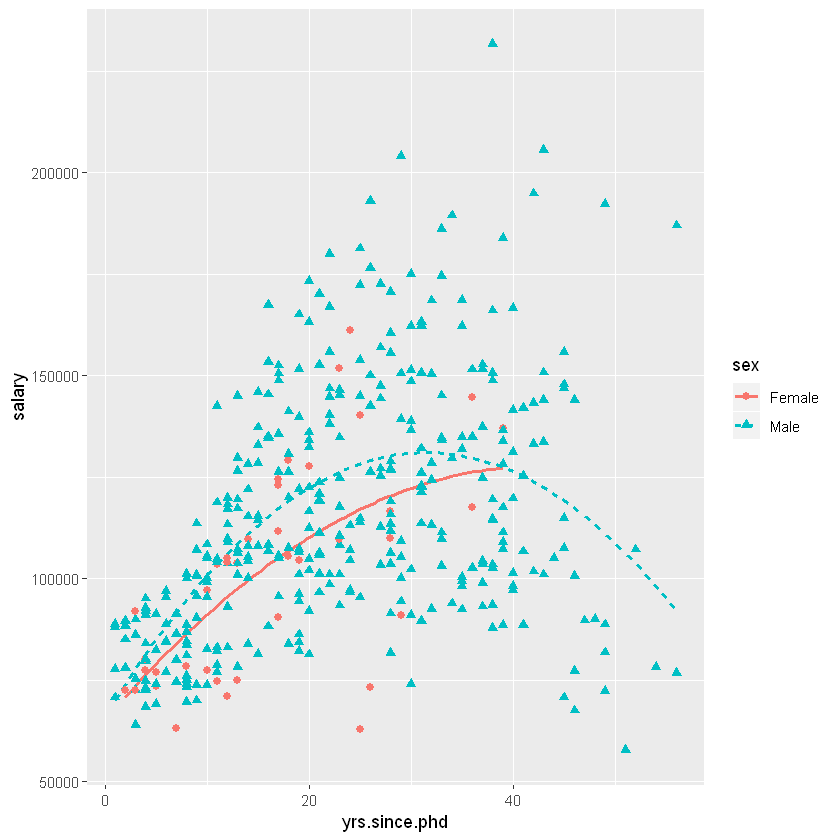

In [19]:
library(car)
data(Salaries)
library(ggplot2)
ggplot(data = Salaries, aes(x=yrs.since.phd,y=salary,linetype=sex,shape=sex,color=sex))+ 
geom_smooth(method=lm,formula
=y~poly(x,2),se=FALSE,size=1)+
geom_point(size=2)

## 修改 ggplot2 函数的外观

和之前的使用 par() 函数来改变基本图形参数不同，ggplot2 有自己的特定函数来定义

### 坐标轴
+ scale_x_continuous() 和 scale_y_continuous() breaks 指定刻度标记 labels 指定刻度标记标签 limits 控制展示的值的范围

+ scale_x_discrete() 和 scale_x_discrete() 类似

+ coord_flip() 颠倒x y 轴



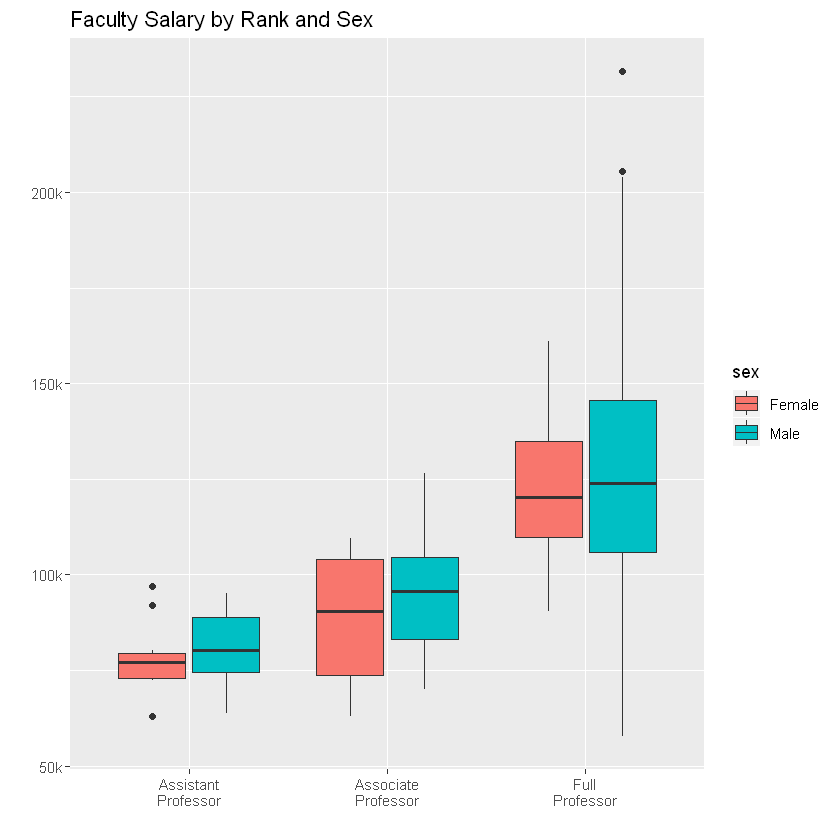

In [20]:
library(car)
data(Salaries)
library(ggplot2)
ggplot(data=Salaries,aes(x=rank,y=salary,fill=sex))+
geom_boxplot()+
scale_x_discrete(breaks=c("AsstProf","AssocProf","Prof"),
labels=c("Assistant\nProfessor","Associate\nProfessor","Full\nProfessor"))+
scale_y_continuous(breaks=c(50000,100000,150000,200000),
                  labels=c("50k","100k","150k","200k"))+
labs(title="Faculty Salary by Rank and Sex",x="",y="")

### 图例
图例中标题和位置是最常用的特征

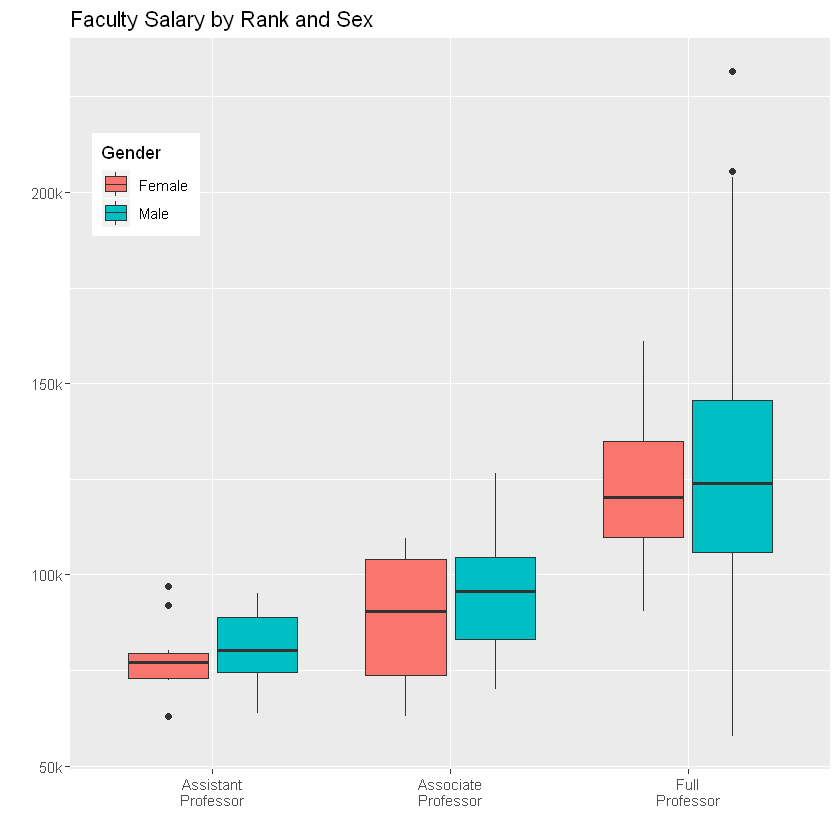

In [22]:
library(car)
data(Salaries)
library(ggplot2)
ggplot(data=Salaries,aes(x=rank,y=salary,fill=sex))+
geom_boxplot()+
scale_x_discrete(breaks=c("AsstProf","AssocProf","Prof"),
labels=c("Assistant\nProfessor","Associate\nProfessor","Full\nProfessor"))+
scale_y_continuous(breaks=c(50000,100000,150000,200000),
                  labels=c("50k","100k","150k","200k"))+
labs(title="Faculty Salary by Rank and Sex",x="",y="",fill= "Gender")+
theme(legend.position = c(.1,.8))
# 默认的 position 的选项有 left top right bottom

### 标尺

使用标尺可以把数据空间中的观察值映射到可视化的空间中，既可以应用到连续的变量，也可以应用到离散的变量

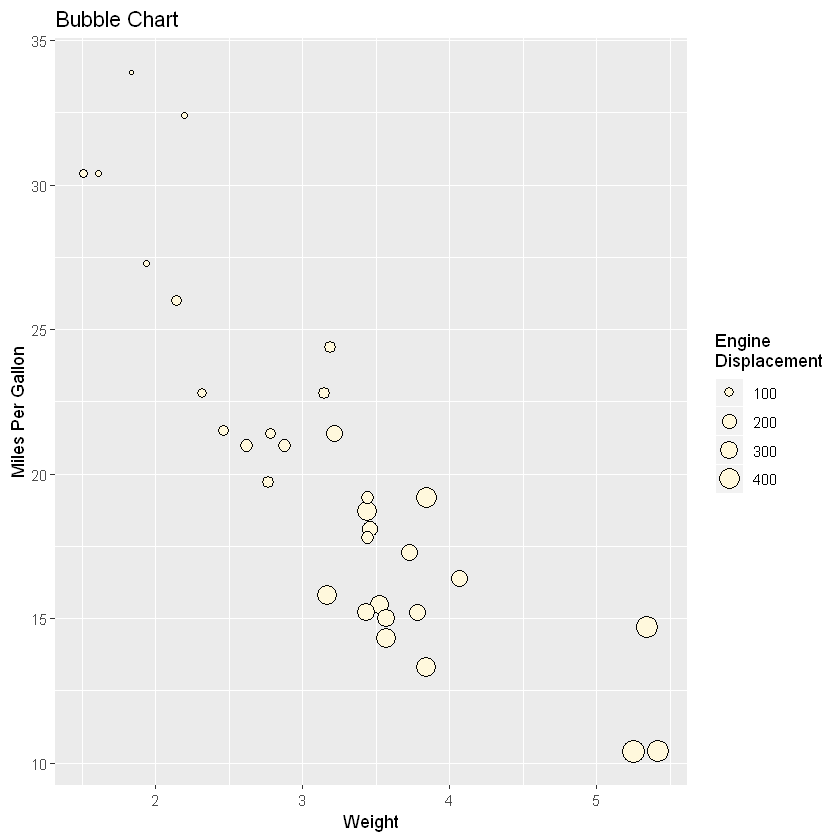

In [23]:
ggplot(mtcars,aes(x=wt,y=mpg,size=disp))+
geom_point(shape=21,color="black",fill="cornsilk")+
labs(x="Weight",y="Miles Per Gallon",
title="Bubble Chart",size="Engine\nDisplacement")

### 主题
theme() 函数可以正对字体、背景、网格线、颜色等进行整体调整并可以保持而使用到多个图中

### 多重图

将多个 ggplot2 的图形放置到单个图形中最简单的方式是使用 gridExtra 包中的 grid.arrange() 函数
注意：截面图是基于一个或者多个分类变量创建一系列的图 而这里我们可以将一系列的图绘制到一个图形中

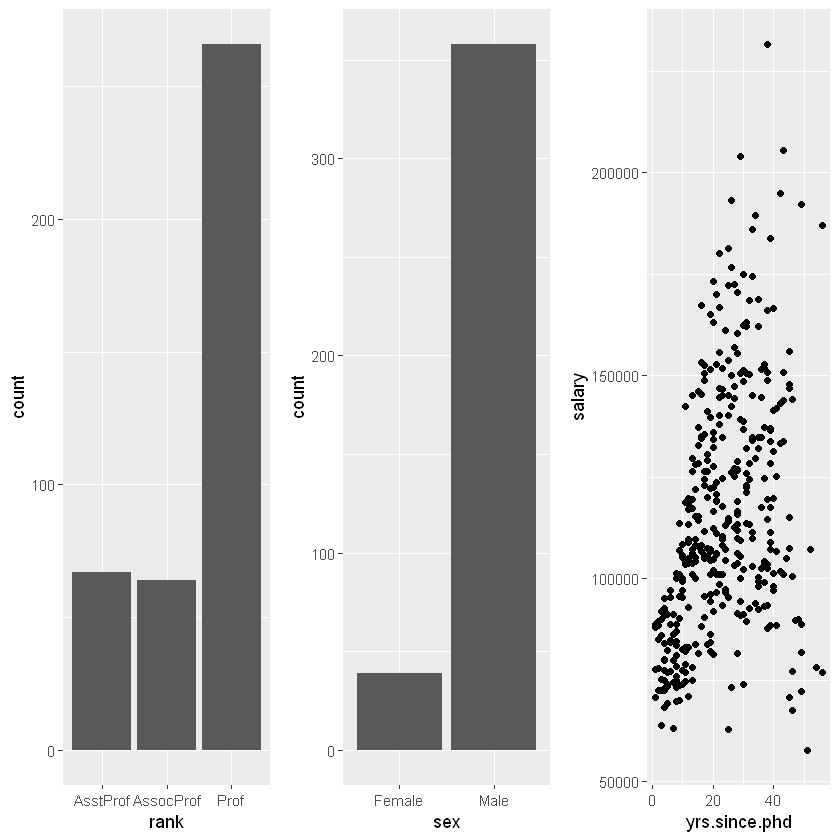

In [27]:
p1 <- ggplot(data=Salaries, aes(x=rank))+geom_bar()
p2 <- ggplot(data=Salaries, aes(x=sex))+geom_bar()
p3 <- ggplot(data=Salaries, aes(x=yrs.since.phd,y=salary))+geom_point()

library(gridExtra)
grid.arrange(p1,p2,p3,ncol=3)

## 图形的保存



In [31]:
ggsave(file="mygrah.png") #保存最近的图像
myplot <- ggplot(data=mtcars,aes(x=mpg))+ geom_histogram()
ggsave(file="myplot.png",plot=myplot,width=5,height=4)

Saving 6.67 x 6.67 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
